In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

/tmp/ipykernel_11623/2143399696.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Part A)

In [2]:
rawData = pd.read_csv('/workspaces/pandas-practice/climdiv_state_year.csv')

Part B)

In [3]:
print(rawData.head())

   fips  year       temp      tempc
0     1  1895  61.641667  16.467593
1     1  1896  64.266667  17.925926
2     1  1897  64.191667  17.884259
3     1  1898  62.983333  17.212963
4     1  1899  63.100000  17.277778


<function matplotlib.pyplot.show(close=None, block=None)>

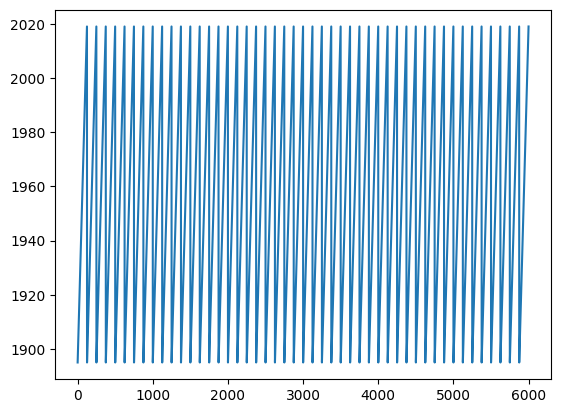

In [4]:
rawData['year'].plot()
plt.show

Here we are plotting the year for each index in the csv file. We can see that we go from 1895 to 2019 for every fip number (each state in the US). This way of formatting the data in a repeated pattern creates the oscillation we see here. 

Part C)

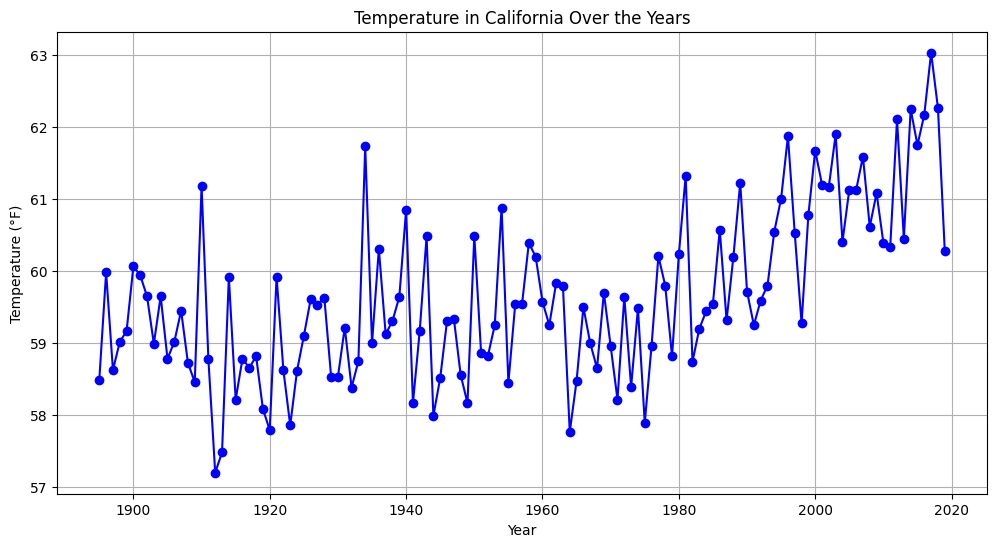

In [6]:
rawData['fips'] = rawData['fips'].astype(str).str.zfill(2)  

california_data = rawData.loc[rawData['fips'] == '04']

plt.figure(figsize=(12, 6))
plt.plot(california_data['year'], california_data['temp'], marker='o', linestyle='-', color='blue')
plt.title('Temperature in California Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.show()

Part D)

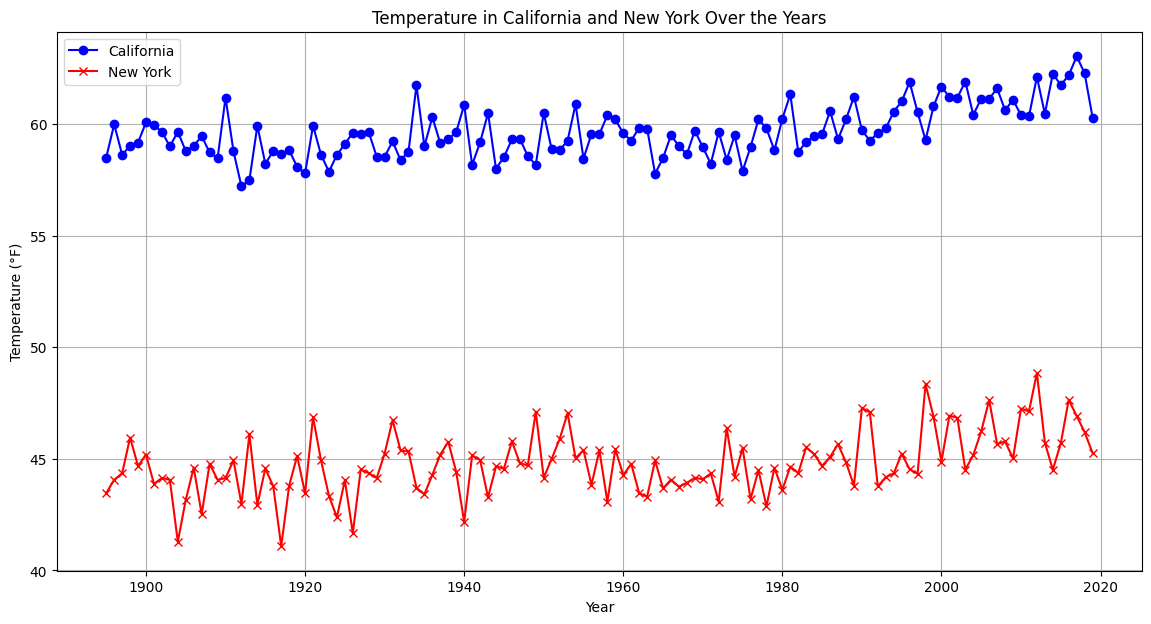

In [7]:
new_york_data = rawData.loc[rawData['fips'] == '36']

# Plotting the temperature in California and New York over the years
plt.figure(figsize=(14, 7))
plt.plot(california_data['year'], california_data['temp'], marker='o', linestyle='-', color='blue', label='California')
plt.plot(new_york_data['year'], new_york_data['temp'], marker='x', linestyle='-', color='red', label='New York')
plt.title('Temperature in California and New York Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()


Part E)

In [8]:
mean_temperature = rawData['temp'].mean()
std_dev_temperature = rawData['temp'].std()

print(f"Mean temp all: {mean_temperature:.2f}")
print(f"Std dev temp all: {std_dev_temperature:.2f}")

Mean temp all: 51.62
Std dev temp all: 8.01


Part F)

In [10]:
# Calculate the mean and standard deviation of all temperatures for California in the database
mean_temperature_ca = california_data['temp'].mean()
std_dev_temperature_ca = california_data['temp'].std()

print(f"CA Mean temp: {mean_temperature_ca:.2f}")
print(f"CA std dev: {std_dev_temperature_ca:.2f}")

CA Mean temp: 59.65
CA std dev: 1.17


Part G)

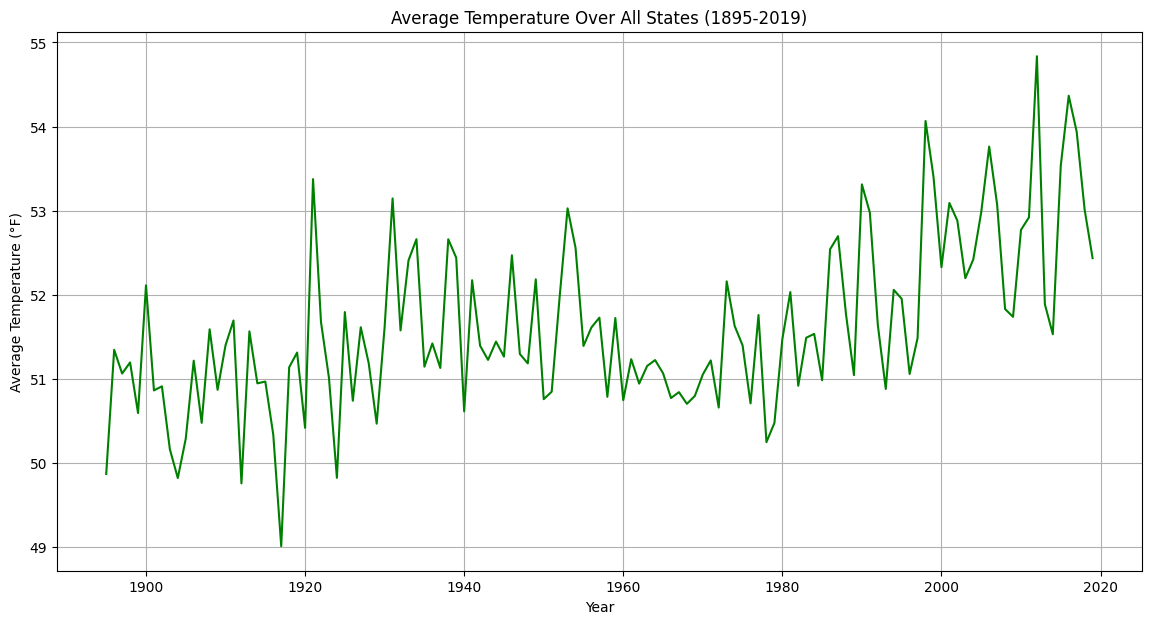

In [24]:
filtered_data = rawData[(rawData['year'] >= 1895) & (rawData['year'] <= 2019)]

average_temperatures_by_year = filtered_data.groupby('year')['temp'].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(average_temperatures_by_year['year'], average_temperatures_by_year['temp'], marker='', linestyle='-', color='green')
plt.title('Average Temperature Over All States (1895-2019)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.grid(True)
plt.show()


Part H)

In [12]:
first_year = rawData['year'].min()

first_30_years_data = rawData[(rawData['year'] >= first_year) & (rawData['year'] < first_year + 30)]

mean_temp_first_30_years = first_30_years_data['temp'].mean()
std_dev_temp_first_30_years = first_30_years_data['temp'].std()

print(f"Mean temp ({first_year} - {first_year + 30}): {mean_temp_first_30_years:.2f}")
print(f"Std dev ({first_year} - {first_year + 30}): {std_dev_temp_first_30_years:.2f}")

Mean temp (1895 - 1925): 50.89
Std dev (1895 - 1925): 8.26


Part I)

In [14]:
last_year = rawData['year'].max() # last year in the data set

last_30_years_data = rawData[(rawData['year'] > last_year - 30) & (rawData['year'] <= last_year)]

mean_temp_last_30_years = last_30_years_data['temp'].mean()
std_dev_temp_last_30_years = last_30_years_data['temp'].std()

print(f"Mean temp ({last_year - 30} - {last_year}): {mean_temp_last_30_years:.2f}")
print(f"Std dev ({last_year - 30} - {last_year}): {std_dev_temp_last_30_years:.2f}")

Mean temp (1989 - 2019): 52.68
Std dev (1989 - 2019): 7.81


Part J)

In [22]:
# calculate the Z-score
mean_temp_entire_dataset = rawData['temp'].mean()
std_dev_temp_entire_dataset = rawData['temp'].std()

n_years_entire_dataset = rawData['year'].nunique()

std_error = std_dev_temp_entire_dataset / (n_years_entire_dataset ** 0.5)

mean_diff = mean_temp_last_30_years - mean_temp_first_30_years
z_score = mean_diff / std_error

p_value = 1 - norm.cdf(z_score)

confidence_level_95 = 0.05
confidence_level_90 = 0.10

result_95_confidence = p_value < confidence_level_95
result_90_confidence = p_value < confidence_level_90

print(f"Z score = {z_score}")
print(f"P value = {p_value}")

if result_90_confidence:
    print(f"90% confidence global warming is real")
else:
    print(f"Global warming is a myth")

if result_95_confidence:
    print(f"95% confidence global warming is real")
else:
    print(f"Global warming is a myth")


Z score = 2.494514114751478
P value = 0.00630648549977797
90% confidence global warming is real
95% confidence global warming is real
